# EDA of Iris Data

In [1]:
# Load in necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [7]:
# Load in the data as a .csv with Pandas
data = pd.read_csv('Irisdata.csv')

In [4]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now we can go into describing the dataset

In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Pandas allows us to quickly view 5 nice points of data (min, 25%, 50%, 75%, max) along with the count, mean, and std of the dataset

In [5]:
# Count the amount of each species of flower
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [6]:
# Split the dataset in train and test in order to apply our ML algorithms. Stratifying by species allows us to keep relative ratios of class distributions intact
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)

## Visualization of iris data

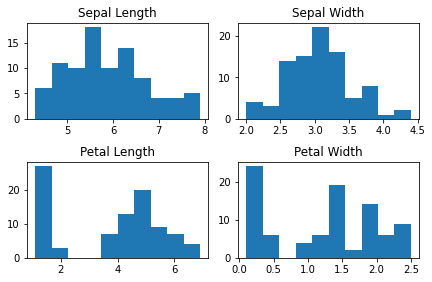

In [7]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');
# add some spacing between subplots
fig.tight_layout(pad=1.0);

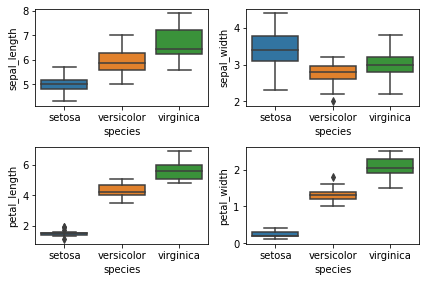

In [8]:
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

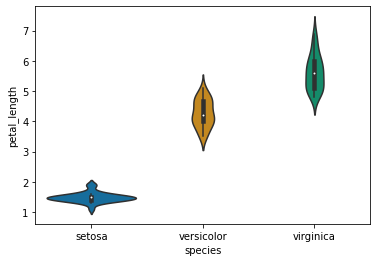

In [9]:
sns.violinplot(x="species", y="petal_length", data=train, size=5, order = cn, palette = 'colorblind');

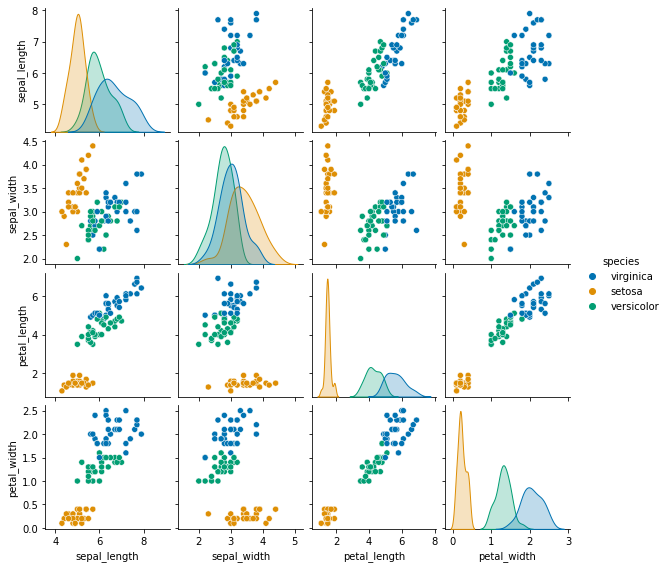

In [10]:
sns.pairplot(train, hue="species", height = 2, palette = 'colorblind');

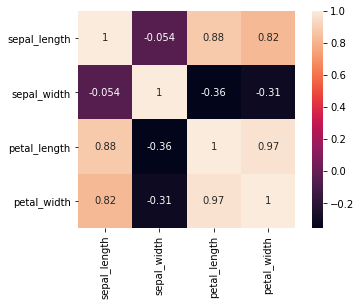

In [11]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

A different visualization from these that we can utilize is parallel line coordinates. This is a lossless data visualization that allows us to see patterns in the data. One example is that petal length is much lower in setosa plants whereas it is highest in virginica.

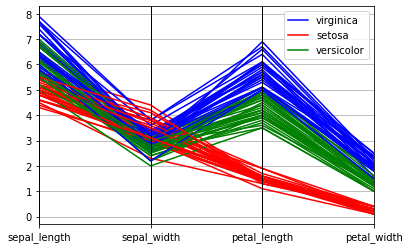

In [12]:
parallel_coordinates(train, "species", color = ['blue', 'red', 'green']);

One of the issues with general ML algorithms is that they are what we refer to as black box models and while powerful, their ability to grab out actional inferences are typically difficult. Now we can go into a more explainable machine learning algorithm, the decision tree.

In [13]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

In [16]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is', '{:.3f}'.format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.983


In [17]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.42430866, 0.57569134])

this shows us that the petal width is especially important in class determination.

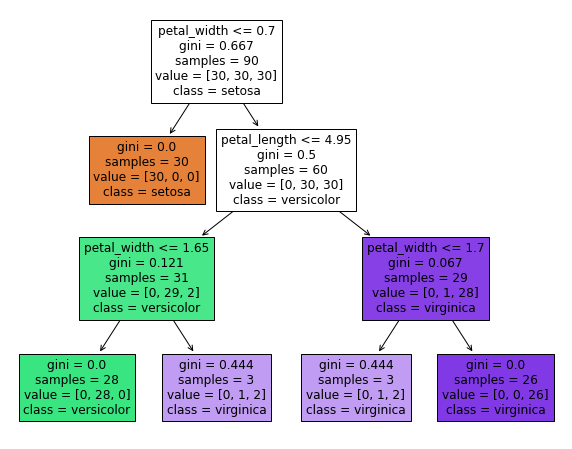

In [18]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

Now we can plot the confusion matrix. The confusion matrix is a quick way to visualize accuracy of the guesses. This is constructed by construction a 3x3 matrix (one for each class) and plotting the true vs predicted labels

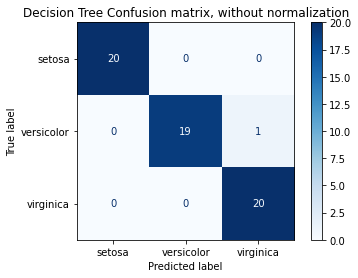

In [19]:
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');